In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 10
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/tommaso/Library/Mobile Documents/com~apple~CloudDocs/University/Didattica/Data Mining/datamining/slides':
  os.chdir(r'/Users/tommaso/Library/Mobile Documents/com~apple~CloudDocs/University/Didattica/Data Mining/datamining/slides')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/var/folders/fx/_f2m8c1d0xd7mqykb5_gcqdr0000gn/T/ipykernel_30334/3048206622.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Users/tommaso/opt/anaconda3/lib/python3.9/importlib/_bootstrap.py": 1669107983.0, "/Users/tommaso/opt/anaconda3/lib/python3.9/importlib/_bootstrap_external.py": 1669107983.0, "/Users/tommaso/opt/anaconda3/lib/python3.9/codecs.py": 1669107978.0, "/Users/tommaso/opt/anaconda3/lib/python3.9/encodings/aliases.py": 1669107984.0, "/Users/tommaso/opt/anaconda3/lib/python3.9/encodings/__init__.py": 1669107984.0, "/Users/tommaso/opt/anaconda3/lib/python3.9/encodings/utf_8.py": 1669107985.0, "/Users/tommaso/opt/anaconda3/lib/python3.9/encodings/latin_1.py": 1669107985.0, "/Users/tommaso/opt/anaconda3/lib/python3.9/abc.py": 1669107978.0, "/Users/tommaso/opt/anaconda3/lib/python3.9/io.py": 1669107979.0, "/Users/tommaso/opt/anaconda3/lib/python3.9/stat.py": 1669107979.0, "/Users/tommaso/opt/anaconda3/lib/python3.9/_collections_abc.py": 1669107978.0, "/Users/tommaso/opt/anaconda3/lib/python3.9/genericpath.py": 1669107978.0, "/Users/tommaso/opt/anaconda3/lib/python3.9/posixpath.py": 1669107979.0, 

In [2]:
import pandas as pd
ames = pd.read_csv("https://datasciencebocconi.github.io/Data/AmesHousing.csv")
ames.head(3)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000


In [3]:
ames.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [4]:
ames['MS Zoning'].value_counts()

RL         2273
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: MS Zoning, dtype: int64

In [5]:
ames = ames[ames['MS Zoning'] != "C (all)"] # Commercial sales
ames = ames[ames['MS Zoning'] != "I (all)"] # Industrial sales
ames = ames[ames['MS Zoning'] != "A (agr)"] # Agricultural sales
ames = ames[ames['MS Zoning'] != "FV"] # Floating village sales

In [6]:
ames['Sale Condition'].value_counts()

Normal     2305
Partial     203
Abnorml     174
Family       46
Alloca       22
AdjLand      12
Name: Sale Condition, dtype: int64

In [7]:
ames = ames[ames['Sale Condition'] == "Normal"] # Only normal sales
ames = ames.drop(columns = ['Sale Condition', 'Sale Type']) # The variable can be dropped

In [8]:
ames = ames.drop(columns = ['Order', 'PID'])

In [9]:
import matplotlib.pyplot as plt # Main graphical library
import seaborn as sns # More advanced graphs

In [10]:
ames['SalePrice'].describe()

count      2305.000000
mean     174639.636876
std       71091.154811
min       35000.000000
25%      129000.000000
50%      157000.000000
75%      203000.000000
max      755000.000000
Name: SalePrice, dtype: float64

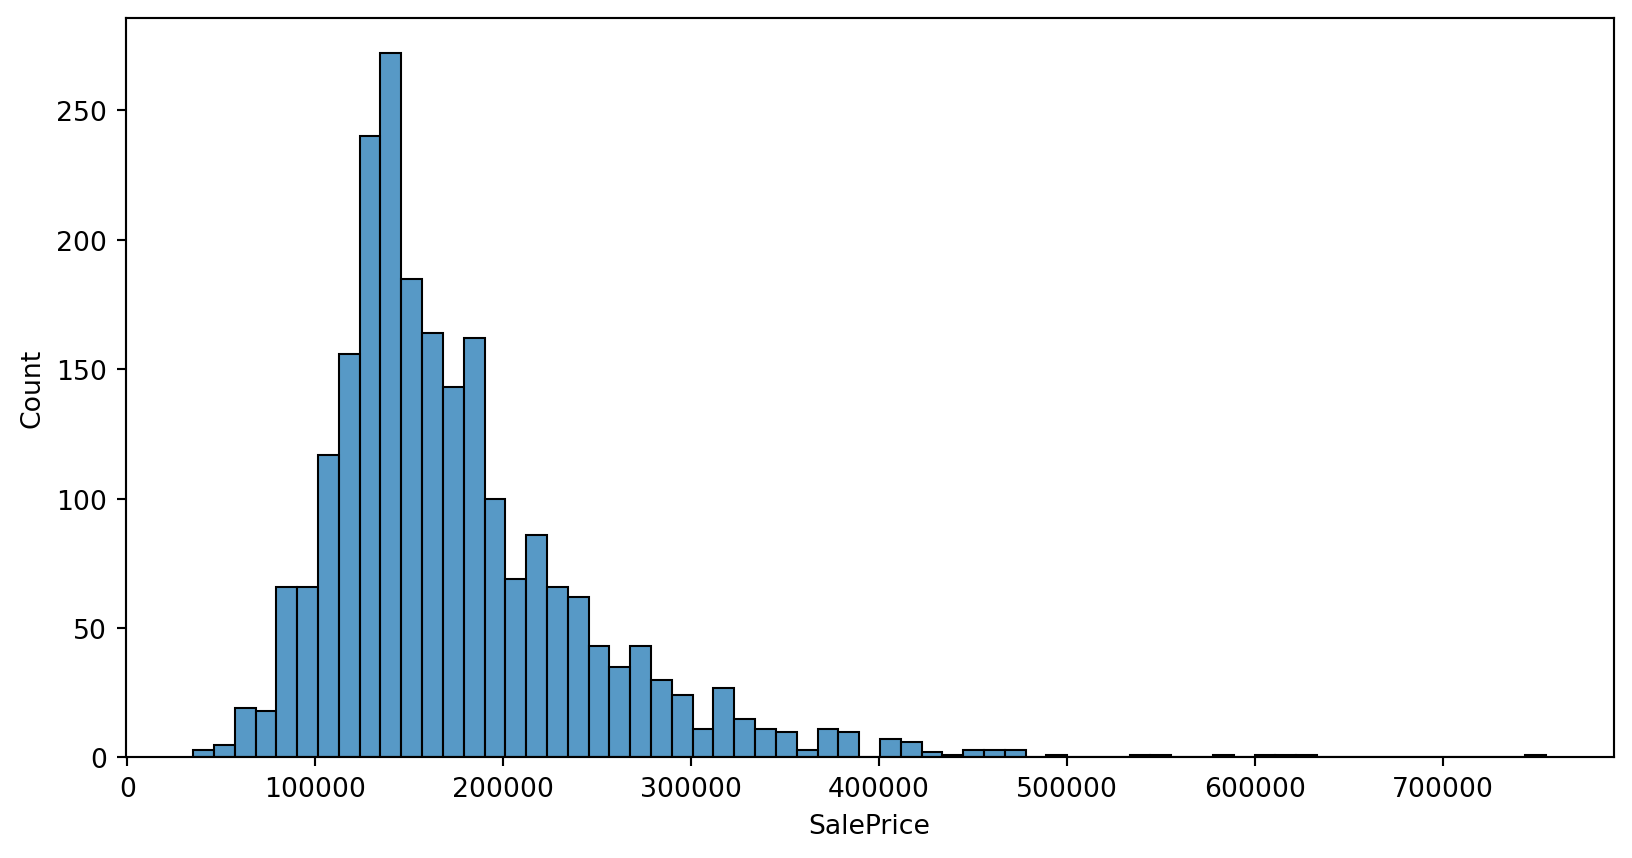

In [11]:
#| fig-pos: 't'
plt.close()
sns.histplot(ames['SalePrice'])
plt.show()

In [12]:
freq = ames.isnull().sum().sort_values(ascending=False)
rel_freq = freq / ames.shape[0]
tab = pd.concat([freq, rel_freq], axis=1, keys=['Frequency', 'Rel. frequency'])
tab.head(25) # Showing just a few of them

,Frequency,Rel. frequency
Pool QC,2296,0.996095
Misc Feature,2210,0.958785
Alley,2187,0.948807
Fence,1806,0.783514
Fireplace Qu,1103,0.478525
Lot Frontage,431,0.186985
Garage Yr Blt,113,0.049024
Garage Finish,113,0.049024
Garage Qual,113,0.049024
Garage Cond,113,0.049024


In [13]:
ames['Alley'] = ames['Alley'].fillna('No alley access')
ames['Alley'].value_counts()

No alley access    2187
Grvl                 99
Pave                 19
Name: Alley, dtype: int64

In [14]:
ames['Bsmt Exposure'] = ames['Bsmt Exposure'].fillna('No basement')
ames['Bsmt Cond'] = ames['Bsmt Cond'].fillna('No basement')
ames['Bsmt Exposure'] = ames['Bsmt Exposure'].fillna('No basement')
ames['BsmtFin Type 1'] = ames['BsmtFin Type 1'].fillna('No basement')
ames['BsmtFin Type 2'] = ames['BsmtFin Type 2'].fillna('No basement')
ames['Bsmt Qual'] = ames['Bsmt Qual'].fillna('No basement')

In [15]:
ames['Bsmt Full Bath'] = ames['Bsmt Full Bath'].fillna(0)
ames['Bsmt Half Bath'] = ames['Bsmt Half Bath'].fillna(0)

In [16]:
ames['Electrical'] = ames['Electrical'].fillna('SBrkr')
ames['Electrical'].value_counts()

SBrkr    2106
FuseA     155
FuseF      39
FuseP       5
Name: Electrical, dtype: int64

In [17]:
ames['Fence'] = ames['Fence'].fillna('No fence')
ames['Fence'].value_counts()

No fence    1806
MnPrv        285
GdPrv        106
GdWo          98
MnWw          10
Name: Fence, dtype: int64

In [18]:
ames['Fireplace Qu'] = ames['Fireplace Qu'].fillna('No fireplace')
ames['Fireplace Qu'].value_counts()

No fireplace    1103
TA               535
Gd               530
Fa                67
Po                43
Ex                27
Name: Fireplace Qu, dtype: int64

In [19]:
ames['Garage Cond'] = ames['Garage Cond'].fillna('No garage')
ames['Garage Finish'] = ames['Garage Finish'].fillna('No garage')
ames['Garage Qual'] = ames['Garage Qual'].fillna('No garage')
ames['Garage Type'] = ames['Garage Type'].fillna('No garage')

In [20]:
ames = ames.drop(columns = ['Garage Yr Blt']) # The variable can be dropped

In [21]:
ames['Lot Frontage'] = ames['Lot Frontage'].fillna(0)

In [22]:
ames['Mas Vnr Type'] = ames['Mas Vnr Type'].fillna('None')
ames['Mas Vnr Area'] = ames['Mas Vnr Area'].fillna(0)

In [23]:
ames['Misc Feature'] = ames['Misc Feature'].fillna('No additional feature')
ames['Misc Feature'] = ames['Misc Feature'].replace(['TenC'],'Othr')
ames['Misc Feature'].value_counts()

No additional feature    2210
Shed                       86
Gar2                        5
Othr                        4
Name: Misc Feature, dtype: int64

In [24]:
ames['Pool QC'] = ames['Pool QC'].fillna('No')
ames['Pool QC'] = ames['Pool QC'].replace(['TA','Ex','Gd', 'Fa'],'Yes')
ames['Pool QC'].value_counts()

No     2296
Yes       9
Name: Pool QC, dtype: int64

In [25]:
ames['Porch Sq Feet'] = ames['Open Porch SF'] + ames['Enclosed Porch'] + ames['3Ssn Porch'] + ames['Screen Porch']

In [26]:
ames['Tot Bathrooms'] = ames['Full Bath'] + 0.5 * ames['Half Bath'] + ames['Bsmt Full Bath'] + 0.5 * ames['Bsmt Half Bath'] 

In [27]:
ames['House Age'] = ames['Yr Sold'] - ames['Year Remod/Add']

In [28]:
# The information is already included in House Age
ames = ames.drop(columns = ['Mo Sold', 'Yr Sold', 'Year Remod/Add', 'Year Built']) 
# The information is already included in Porch Sq Feet
ames = ames.drop(columns = ['Open Porch SF', 'Enclosed Porch', '3Ssn Porch','Screen Porch']) 
# The information is already included in Tot Bathrooms
ames = ames.drop(columns = ['Full Bath', 'Half Bath', 'Bsmt Full Bath','Bsmt Half Bath']) 
# Almost no information is present in these variables
ames = ames.drop(columns = ['Pool Area', 'Utilities']) 

In [29]:
import numpy as np
X = ames.drop(columns = ['SalePrice'])
numeric_feats = X.dtypes[X.dtypes != "object"].index # Identify the numerical features
X[numeric_feats] = X[numeric_feats].apply(lambda x: (x - np.mean(x)) / np.std(x)) # Standardization

In [30]:
X = pd.get_dummies(X)
X.shape

(2305, 271)

In [31]:
# This removes identical columns
X = X.T.drop_duplicates().T
X.shape

(2305, 266)

In [32]:
from sklearn.model_selection import train_test_split
y = ames['SalePrice']

ames_train, ames_test, X_train, X_test, y_train, y_test, = train_test_split(ames, X, y, test_size = 0.33, random_state=42)

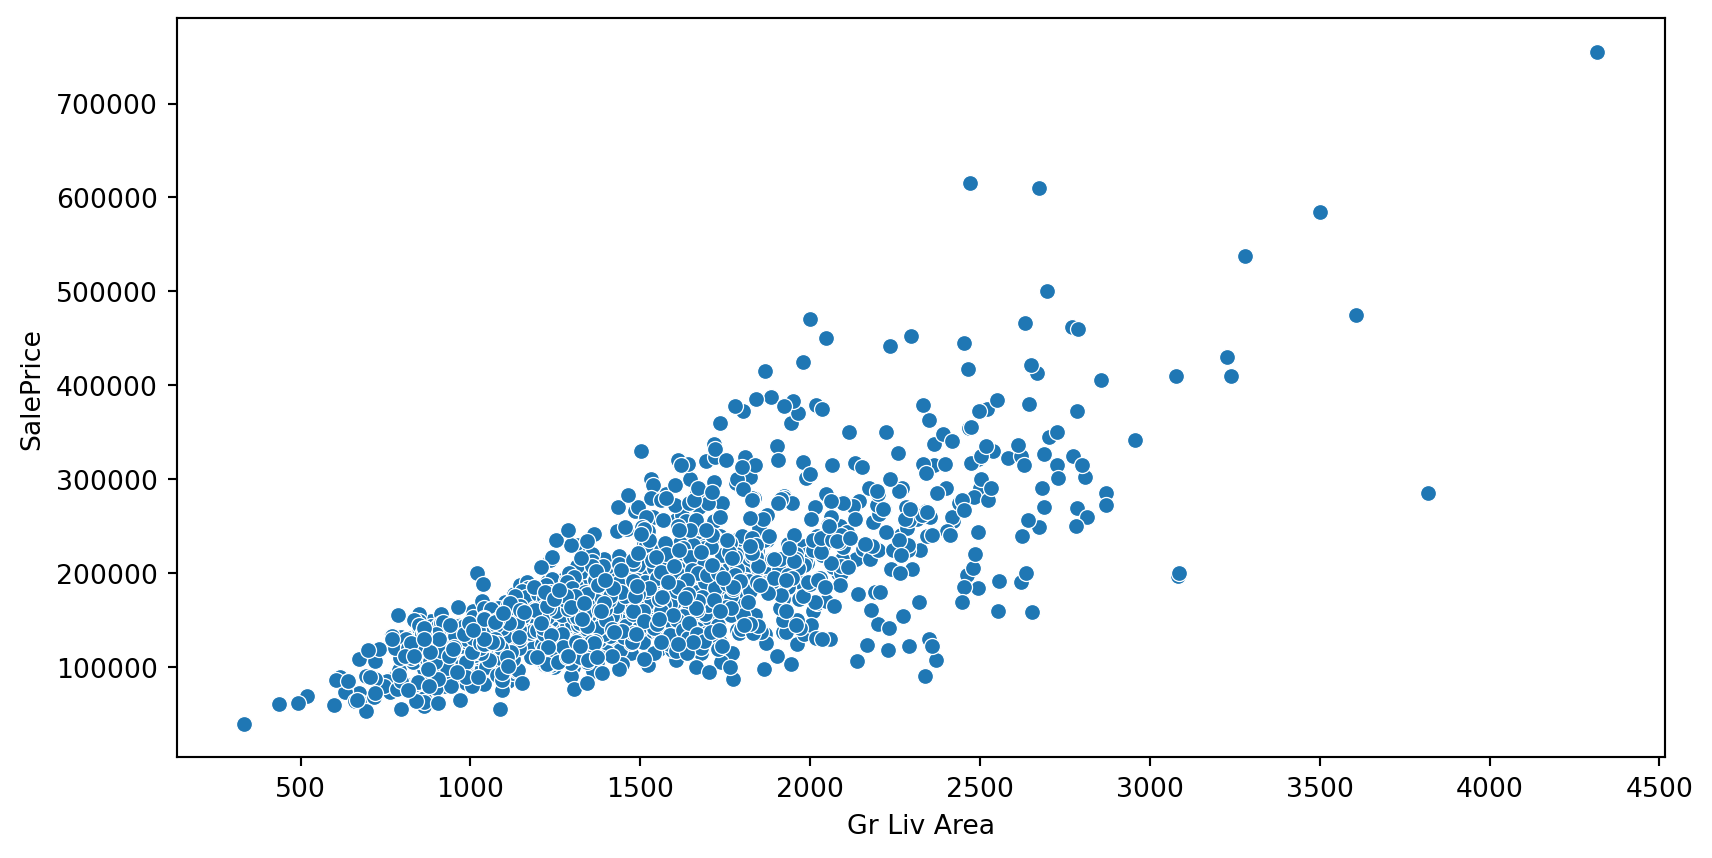

In [33]:
#| fig-pos: 't'
plt.close()
sns.scatterplot(x="Gr Liv Area", y="SalePrice", data=ames_train);
plt.show()

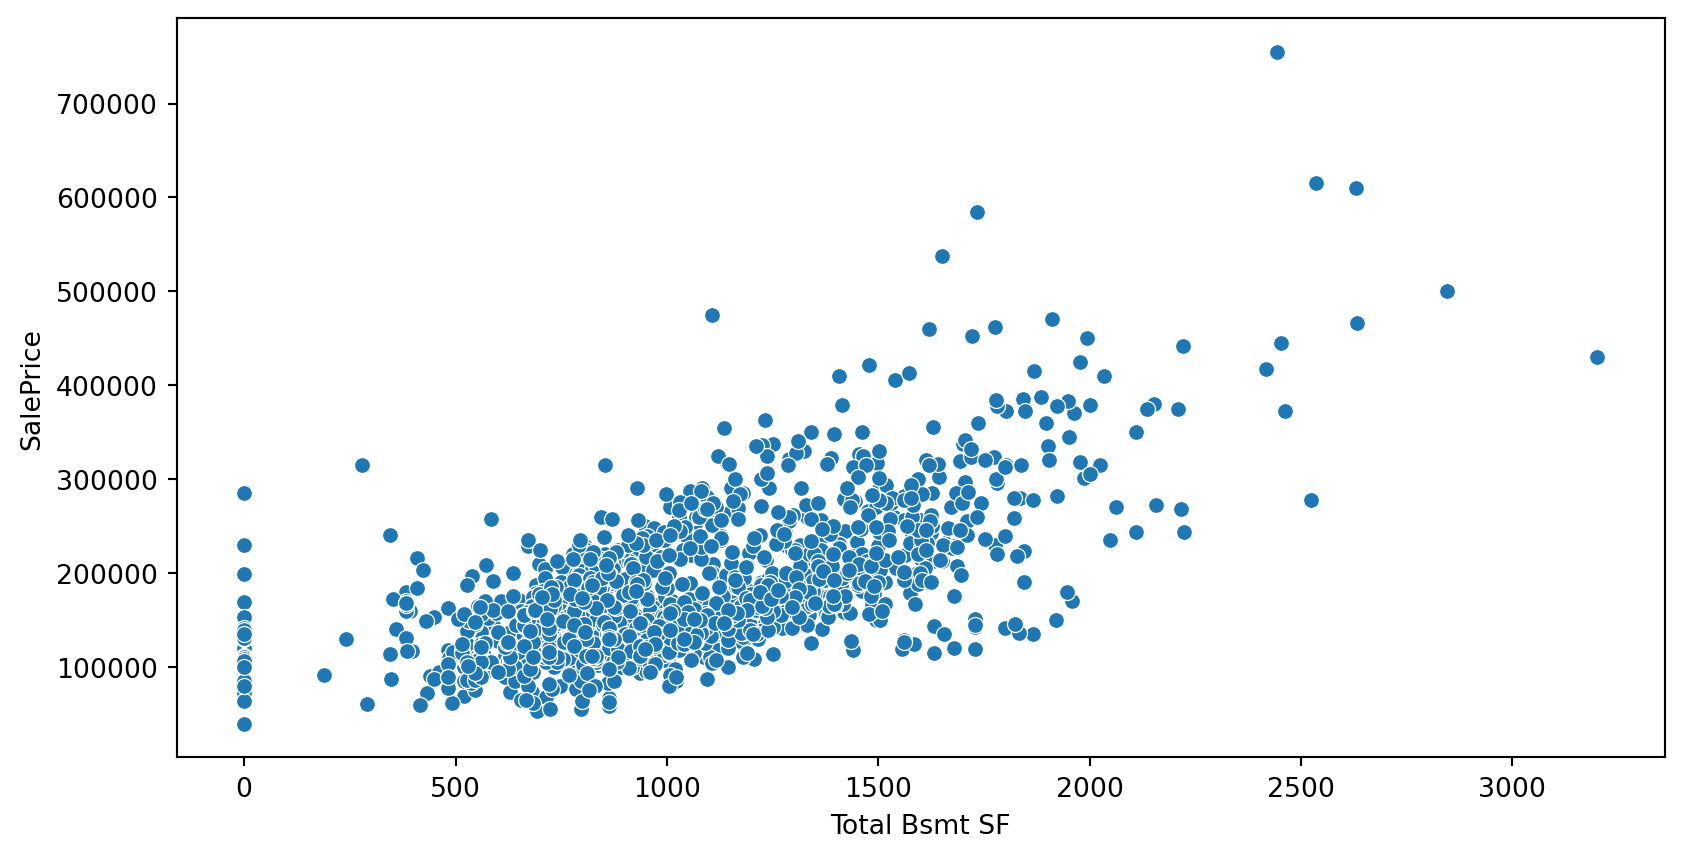

In [34]:
#| fig-pos: 't'
plt.close()
sns.scatterplot(x="Total Bsmt SF", y="SalePrice", data=ames_train);
plt.show()

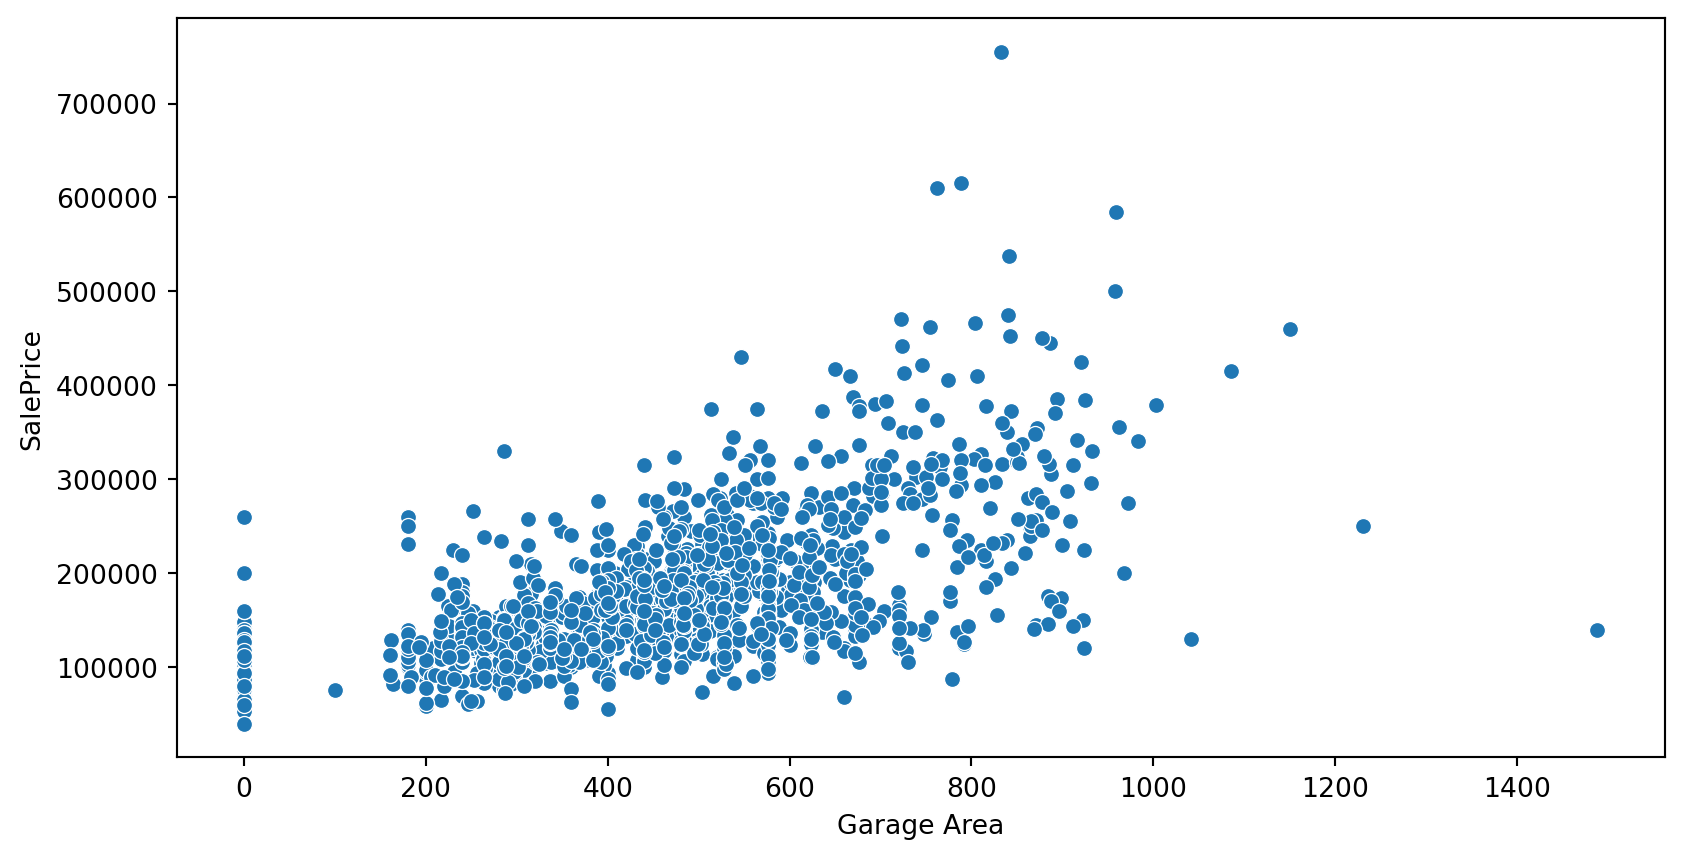

In [35]:
#| fig-pos: 't'
plt.close()
sns.scatterplot(x="Garage Area", y="SalePrice", data=ames_train);
plt.show()

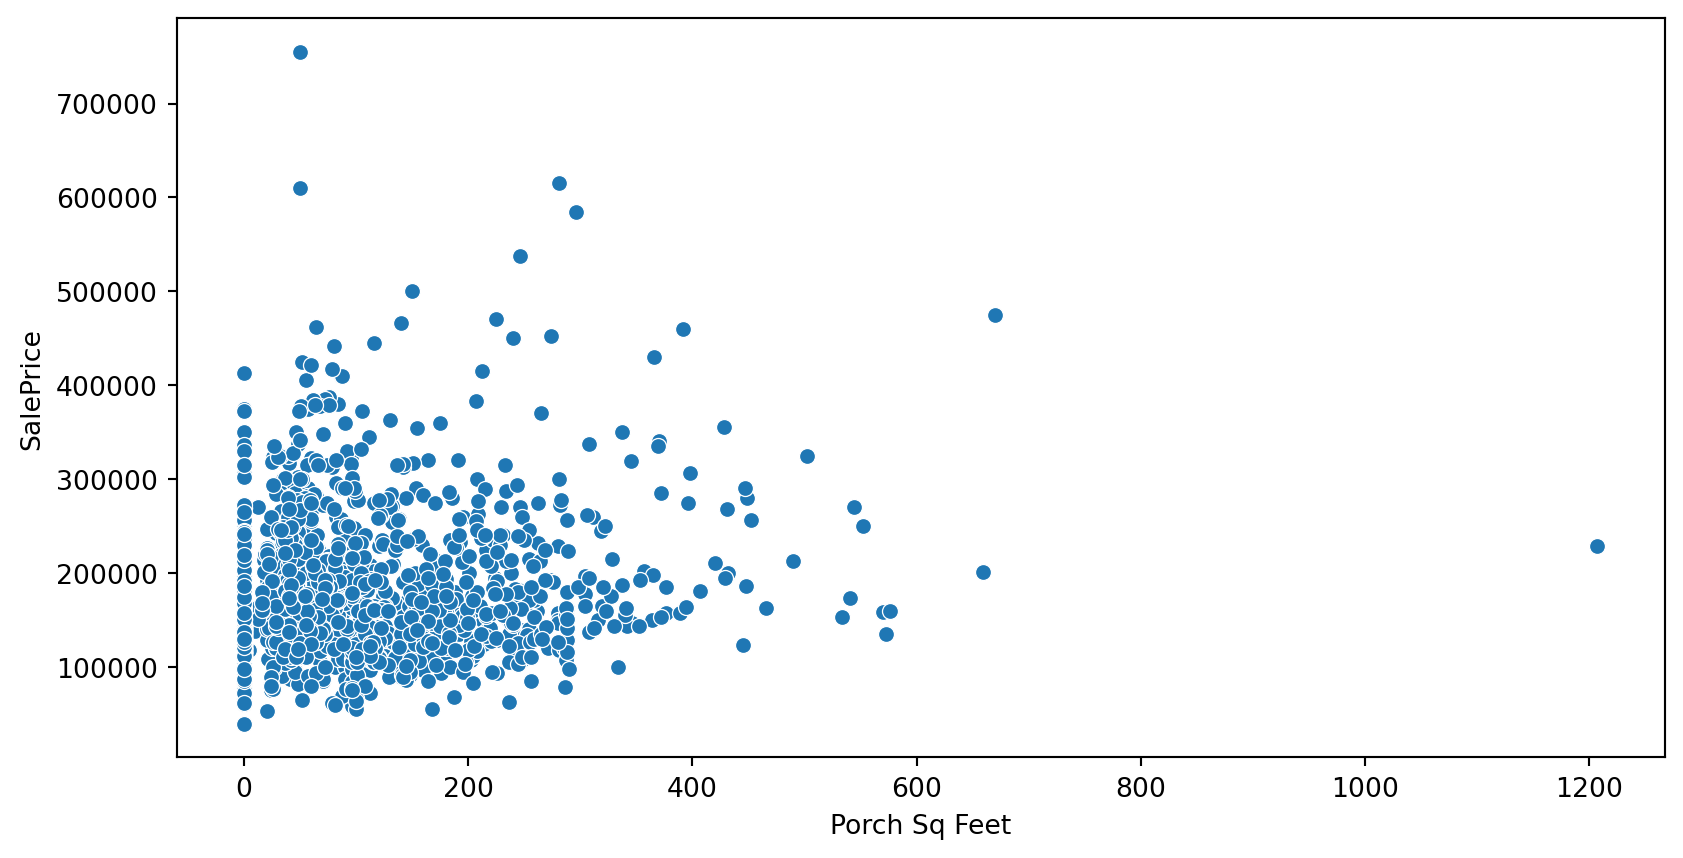

In [36]:
#| fig-pos: 't'
plt.close()
sns.scatterplot(x="Porch Sq Feet", y="SalePrice", data=ames_train);
plt.show()

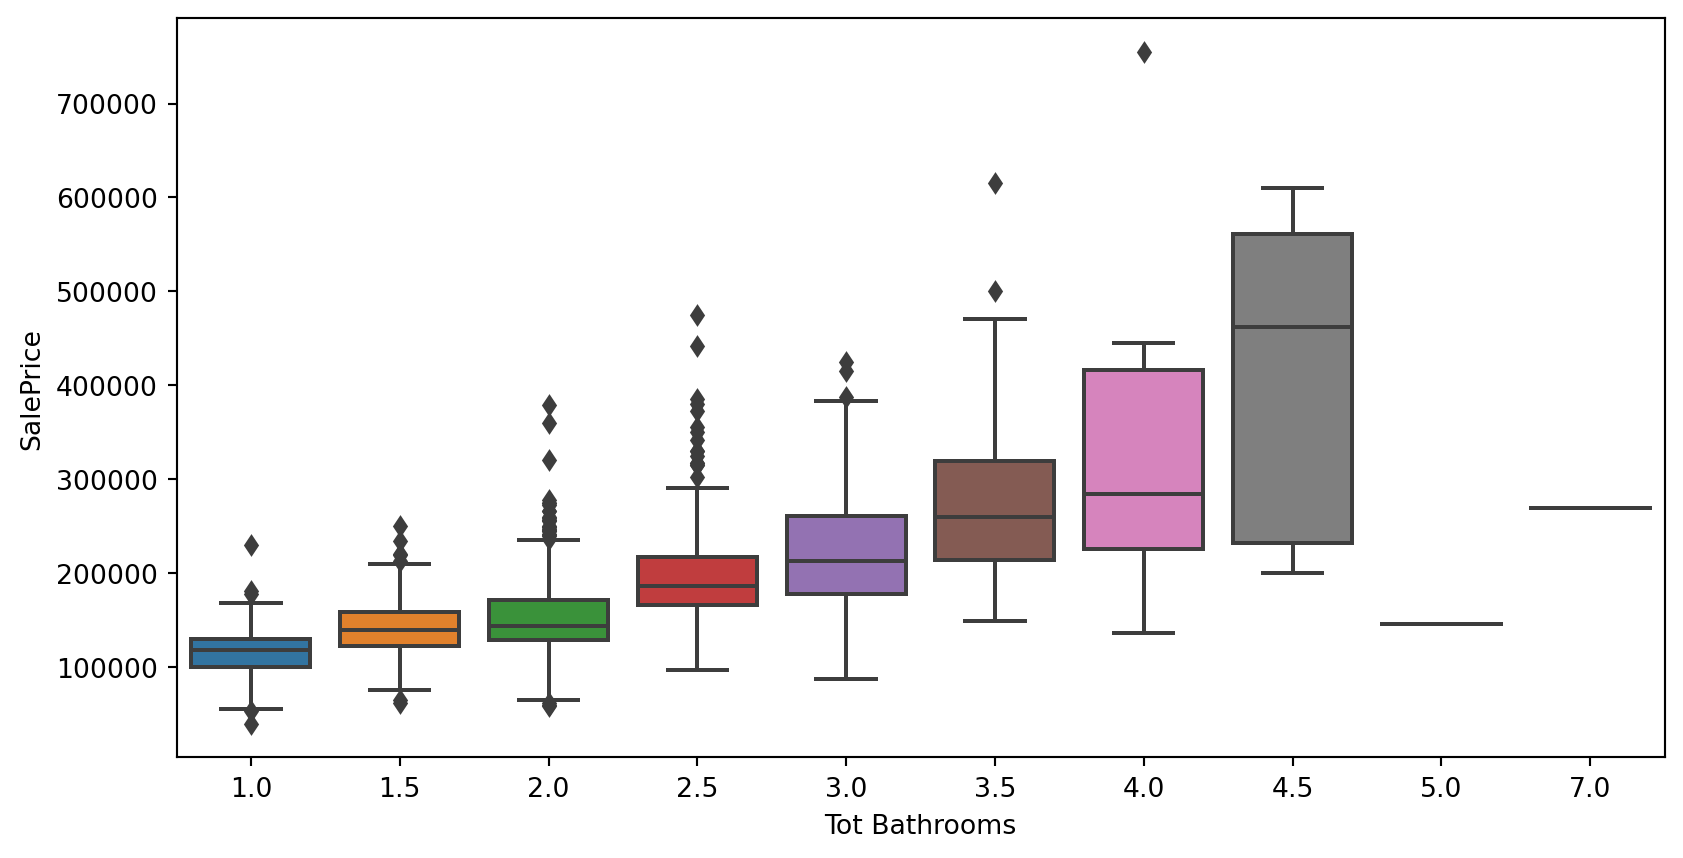

In [37]:
#| fig-pos: 't'
plt.close()
sns.boxplot(x="Tot Bathrooms", y="SalePrice", data=ames_train);
plt.show()

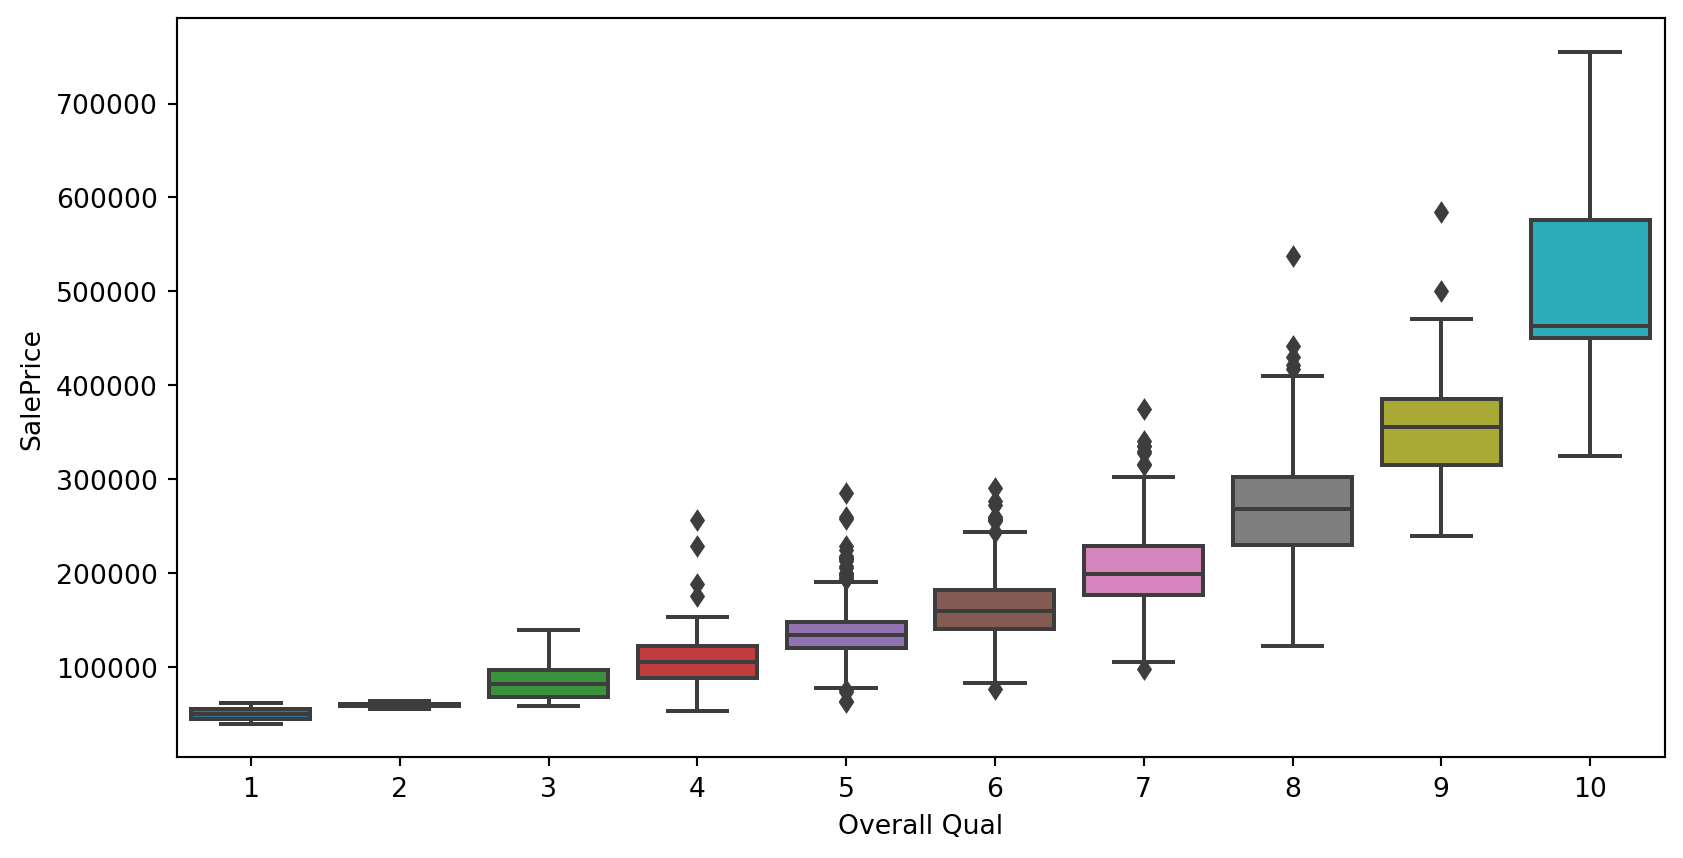

In [38]:
#| fig-pos: 't'
plt.close()
sns.boxplot(x="Overall Qual", y="SalePrice", data=ames_train);
plt.show()

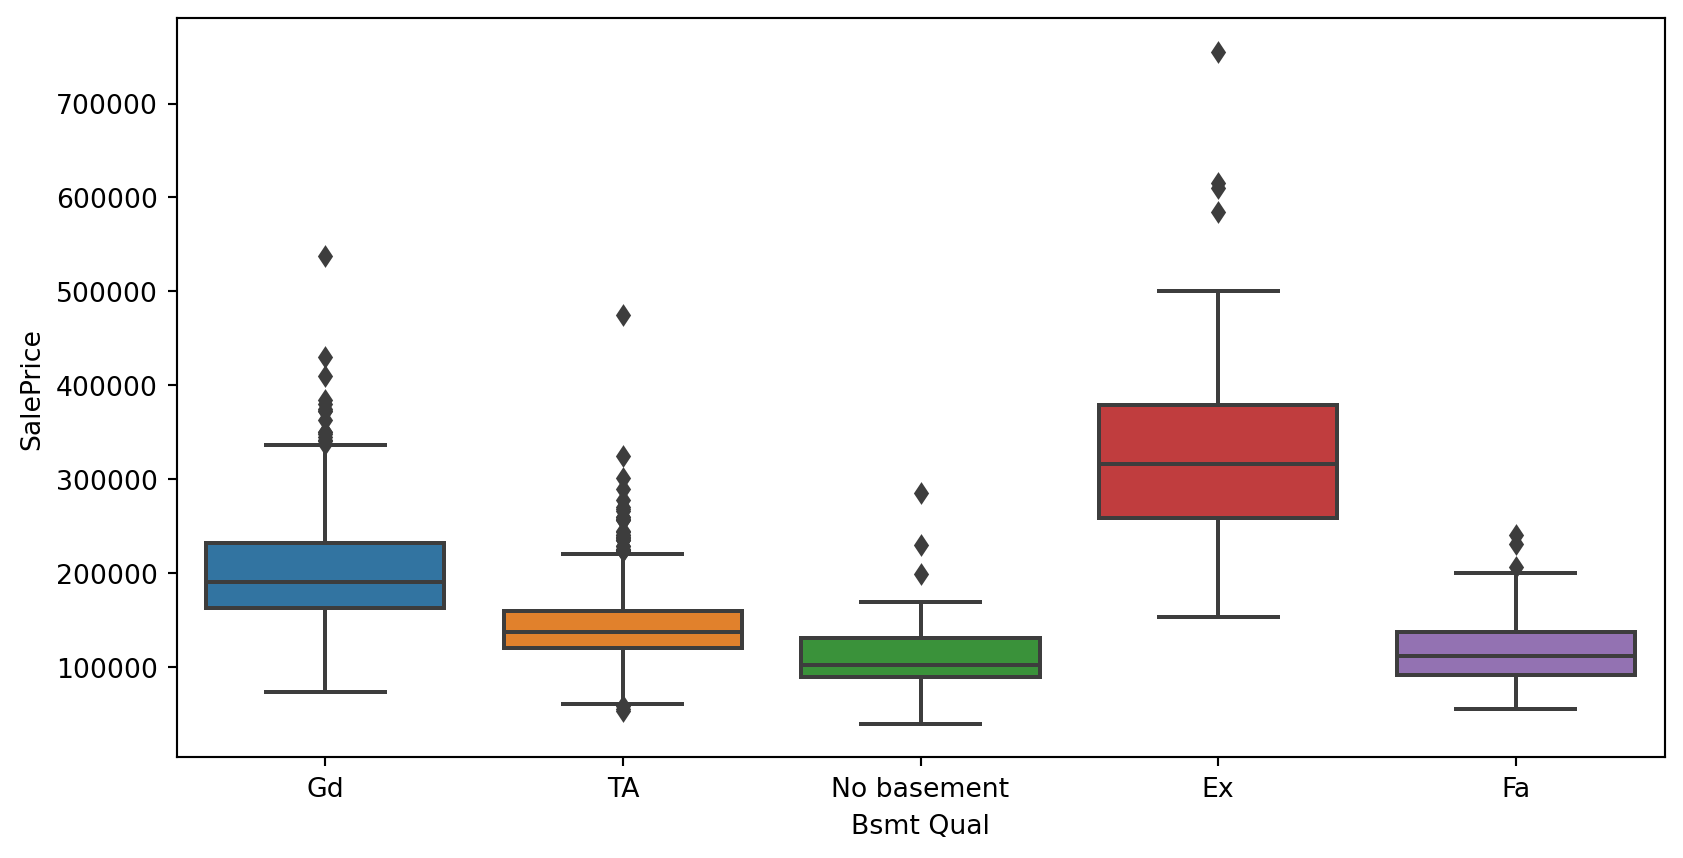

In [39]:
#| fig-pos: 't'
plt.close()
sns.boxplot(x="Bsmt Qual", y="SalePrice", data=ames_train);
plt.show()

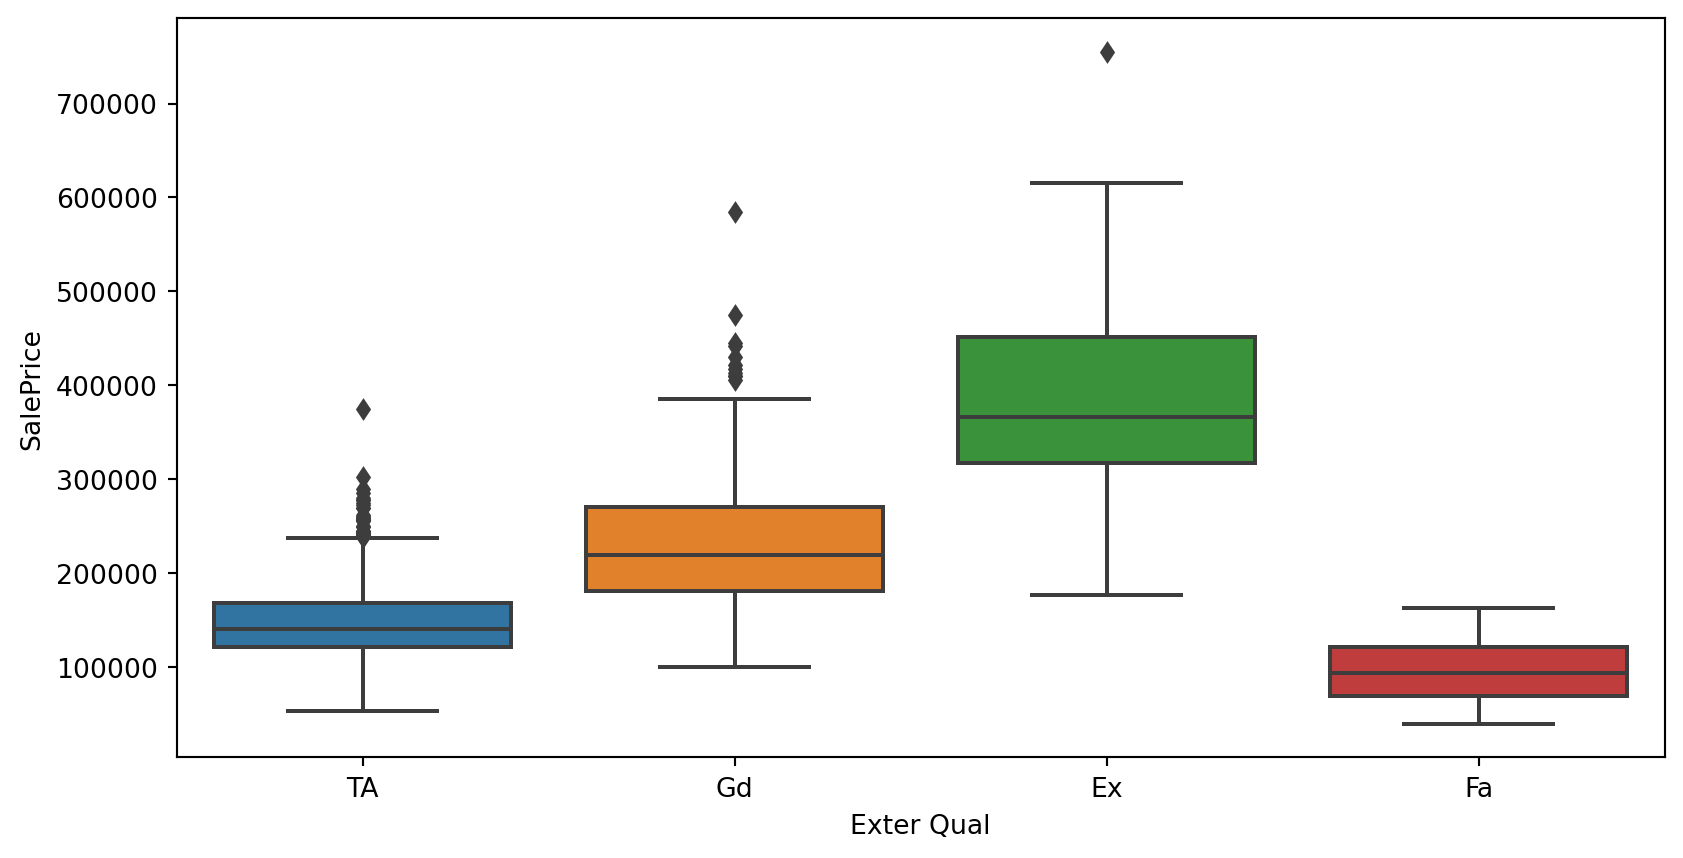

In [40]:
#| fig-pos: 't'
plt.close()
sns.boxplot(x="Exter Qual", y="SalePrice", data=ames_train);
plt.show()

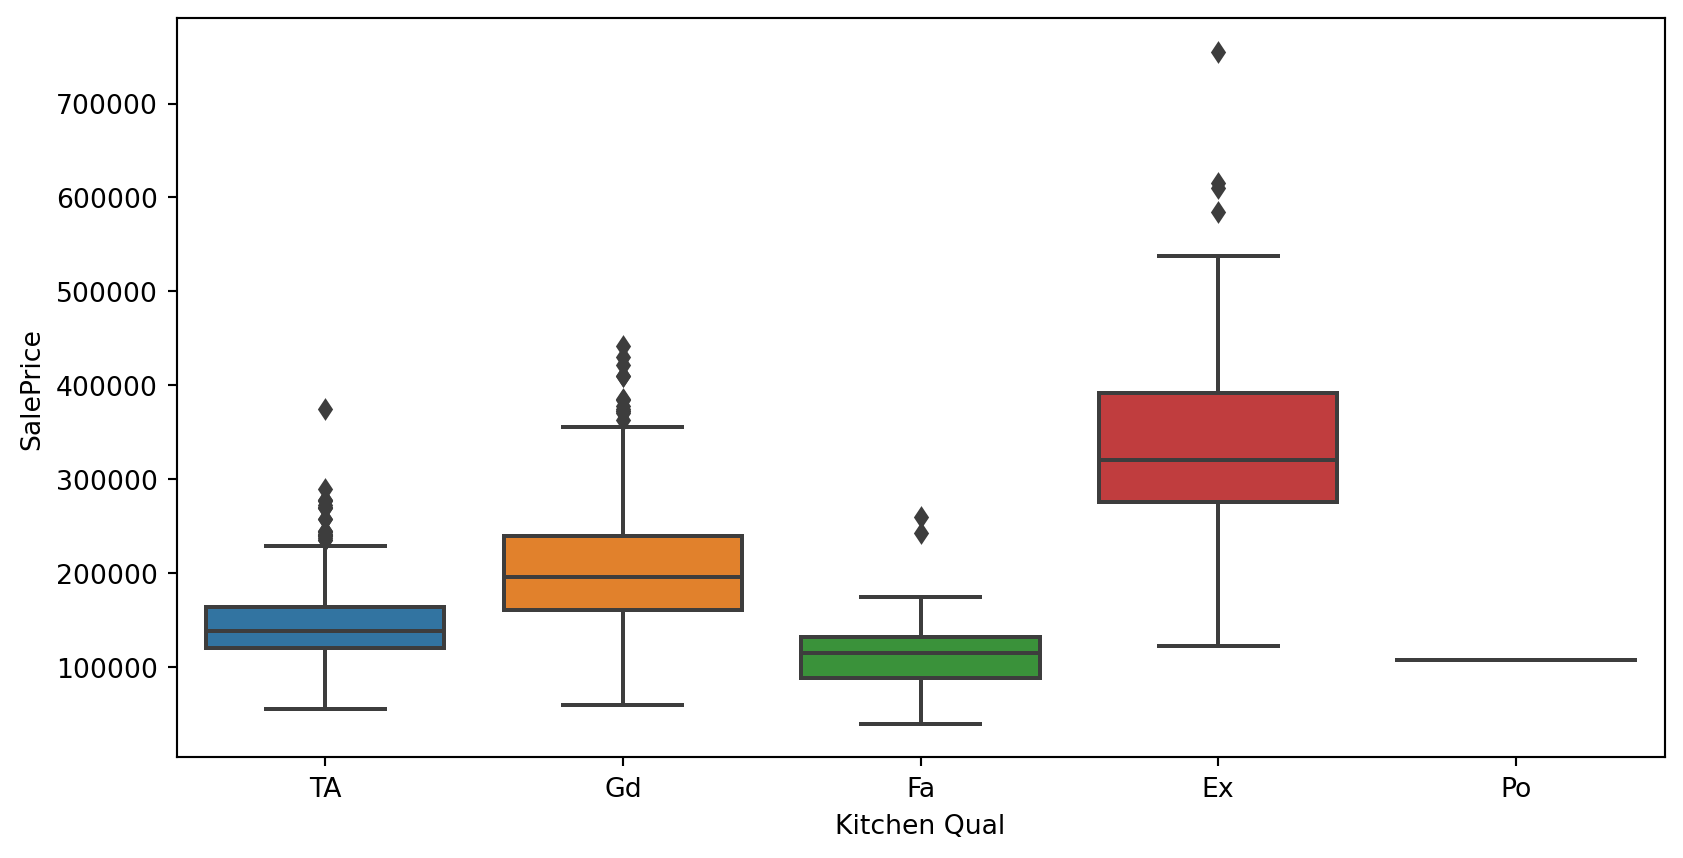

In [41]:
#| fig-pos: 't'
plt.close()
sns.boxplot(x="Kitchen Qual", y="SalePrice", data=ames_train);
plt.show()

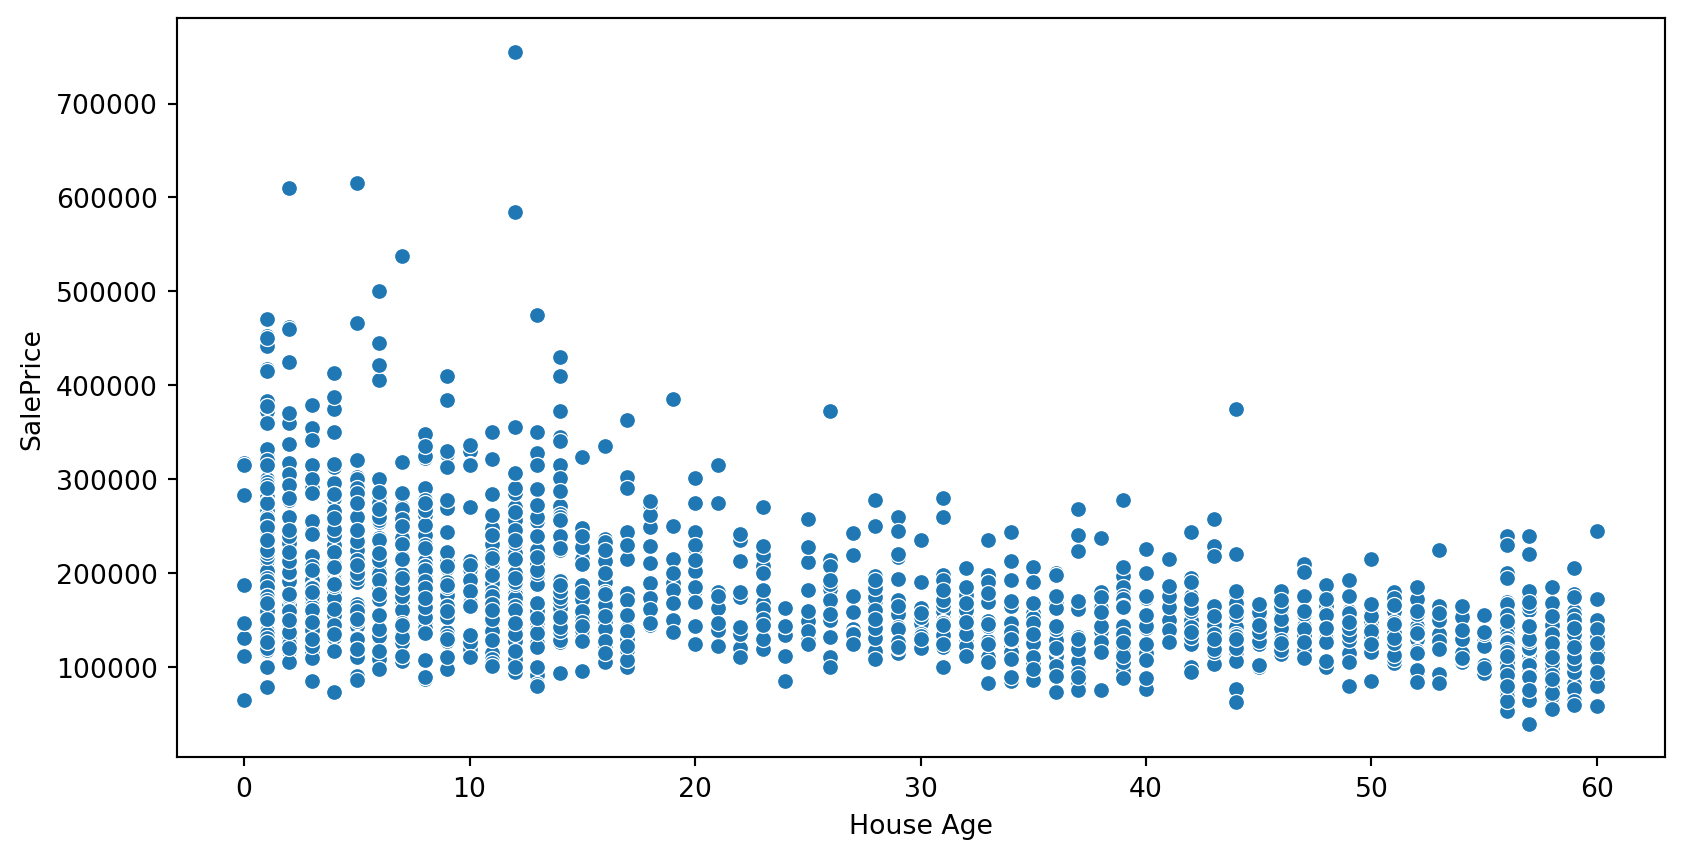

In [42]:
#| fig-pos: 't'
plt.close()
sns.scatterplot(x="House Age", y="SalePrice", data=ames_train);
plt.show()

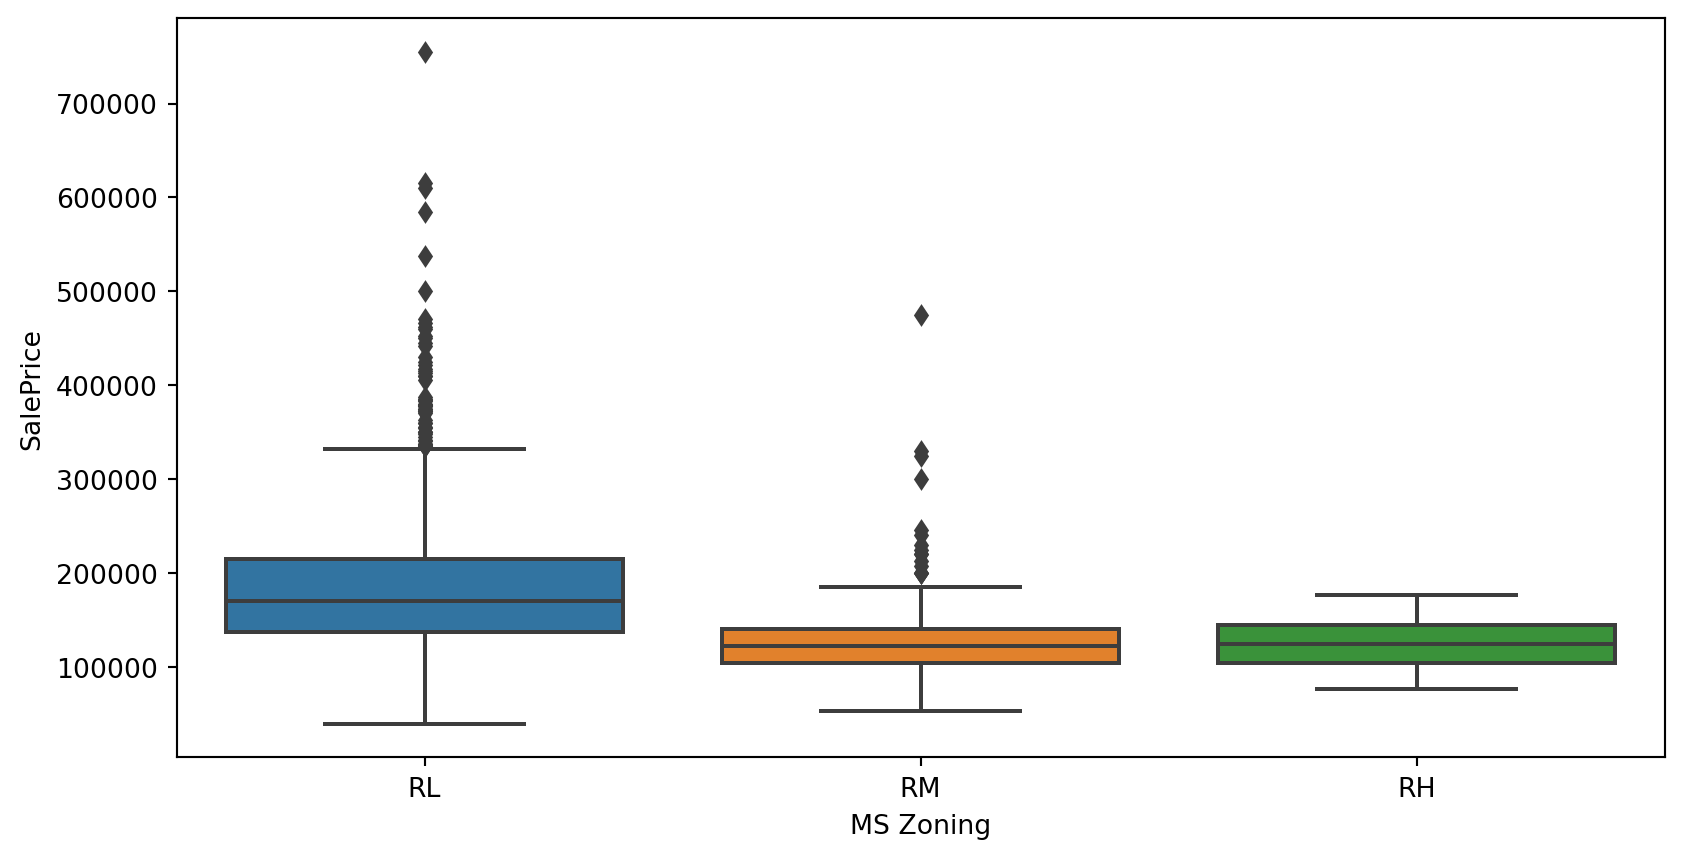

In [43]:
#| fig-pos: 't'
plt.close()
sns.boxplot(x="MS Zoning", y="SalePrice", data=ames_train);
plt.show()

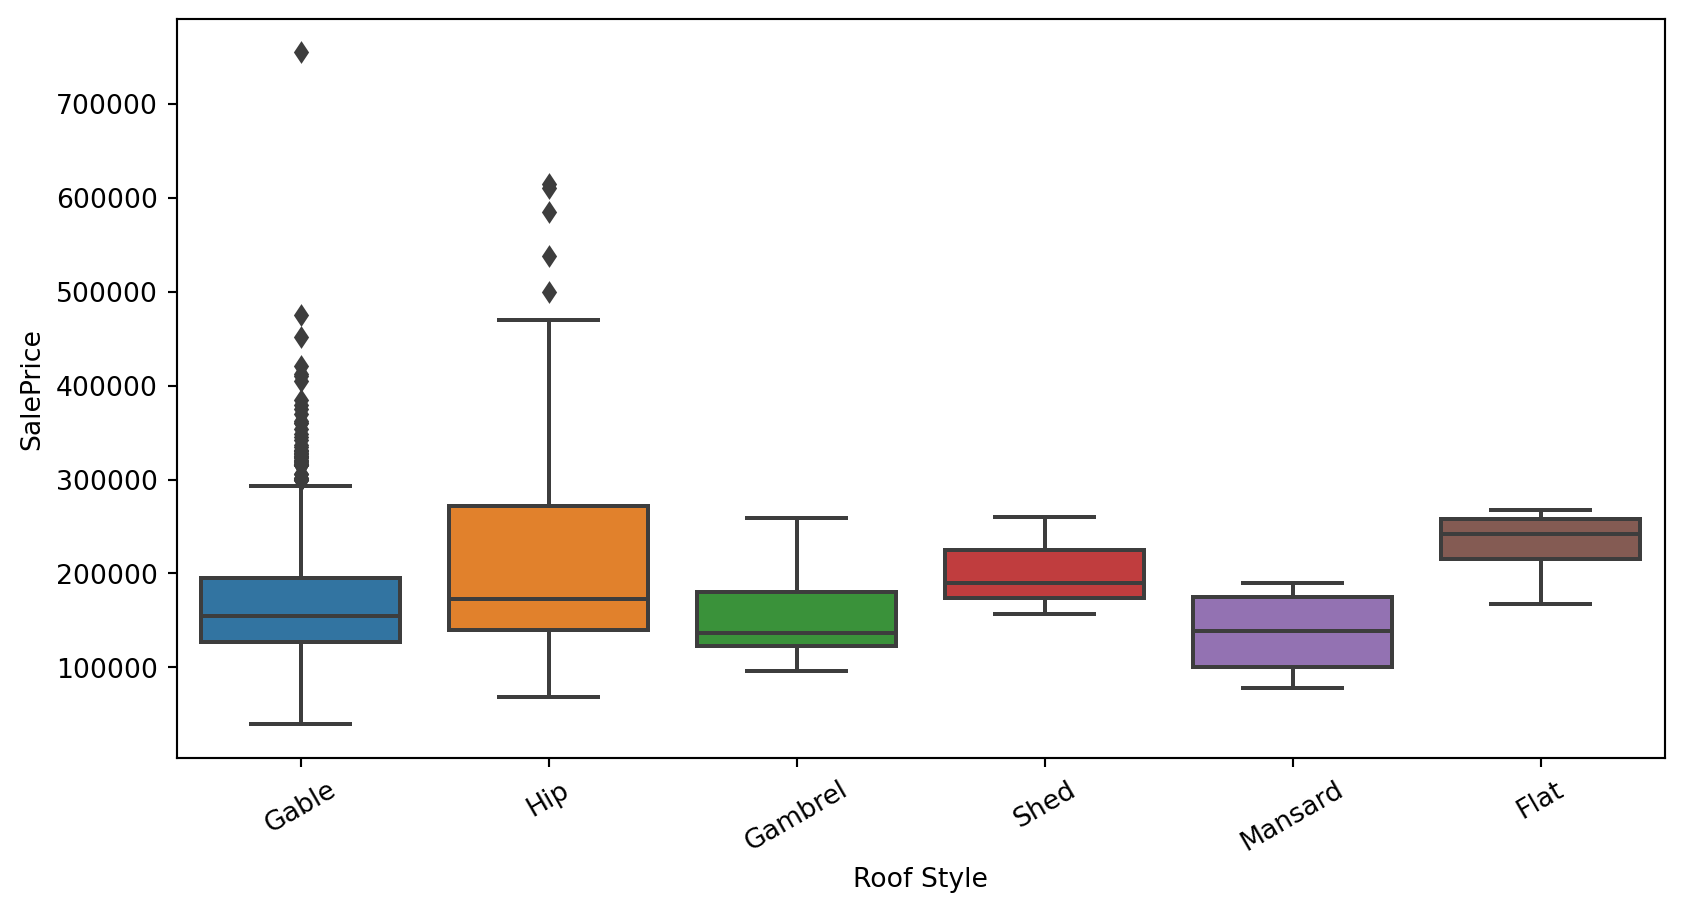

In [44]:
#| fig-pos: 't'
plt.close()
plt.xticks(rotation=30)
sns.boxplot(x="Roof Style", y="SalePrice", data=ames_train);
plt.show()

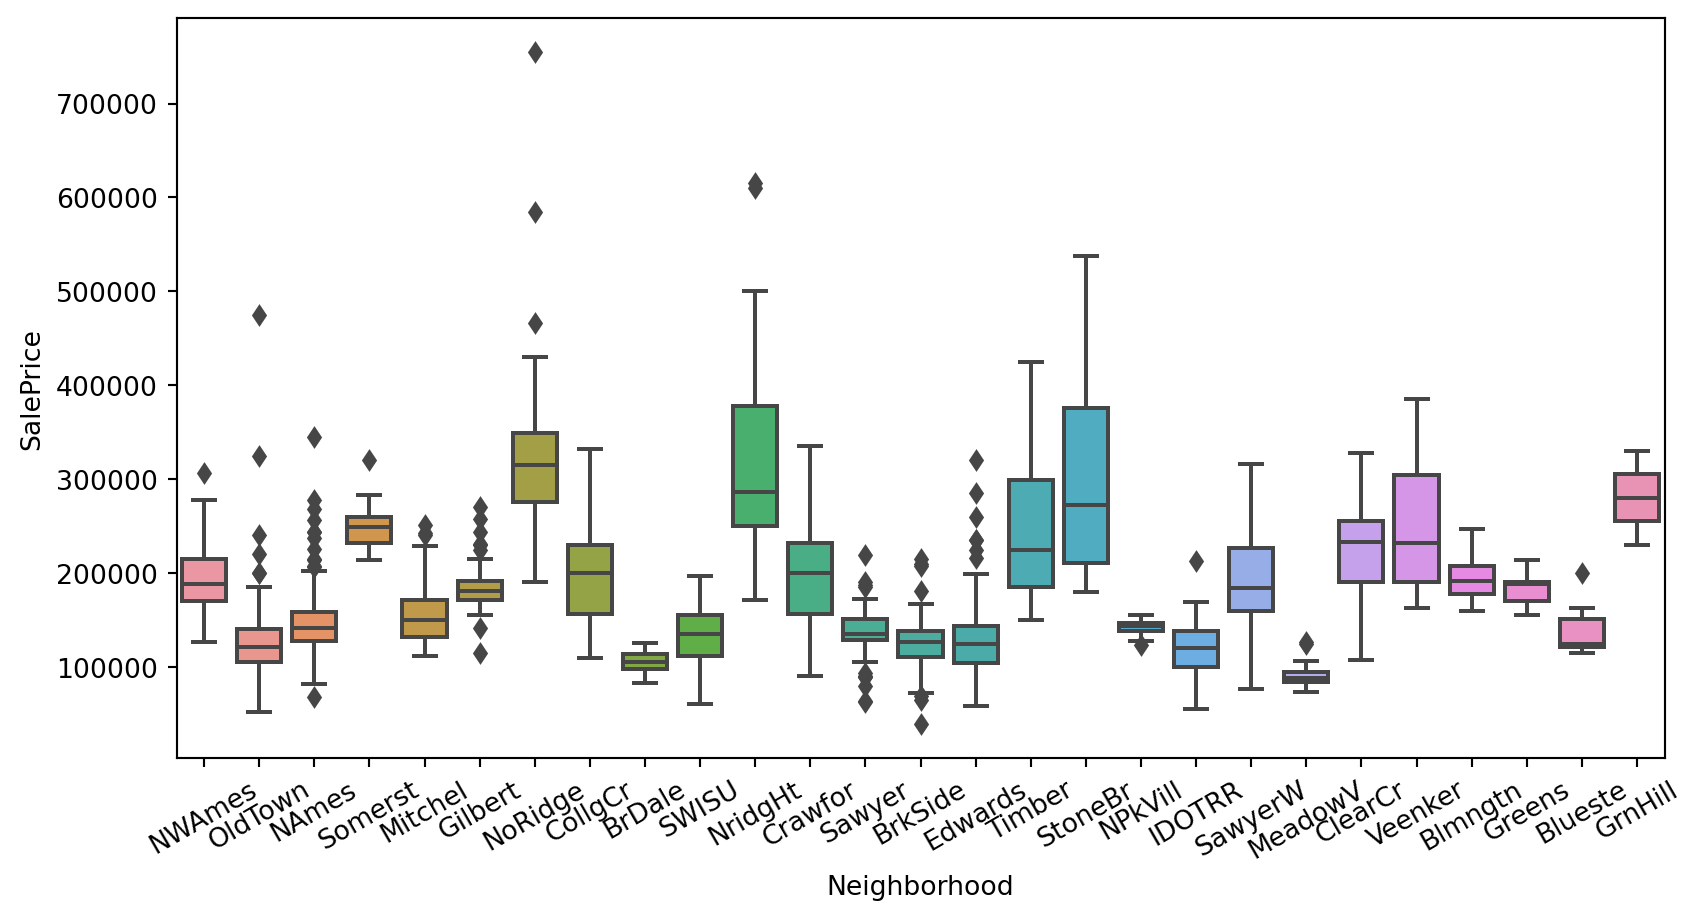

In [45]:
#| fig-pos: 't'
plt.close()
plt.xticks(rotation=30)
sns.boxplot(x="Neighborhood", y="SalePrice", data=ames_train);
plt.show()

In [46]:
median = np.median(y_train)
y_median = np.repeat(median, ames_test.shape[0]) # Prediction
median

159000.0

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print ("Mean absolute error (MAE): ", round(mean_absolute_error(y_median, y_test), 4))
print ("Root mean squared logarithmic error (RMSLE): ", round(np.sqrt(mean_squared_error(np.log(y_median), np.log(y_test))), 4))

Mean absolute error (MAE):  47735.5283
Root mean squared logarithmic error (RMSLE):  0.3609


In [48]:
X_train_simple = ames_train[['Gr Liv Area', 'Overall Qual', 'House Age', 'Tot Bathrooms']]

In [49]:
from sklearn.linear_model import LinearRegression

# Fit a linear regression model
m_linear = LinearRegression()
m_linear.fit(X_train_simple, y_train)
m_linear.coef_ # The intercept is not included in this vector

array([   53.41690979, 25025.90405477,  -280.03872291, 15773.10205046])

In [50]:
def scores_report(y, y_pred):
  print ("Mean absolute error (MAE): ", round(mean_absolute_error(y, y_pred), 4))
  print ("Root mean squared logarithmic error (RMSLE): ", round(np.sqrt(mean_squared_error(np.log(y), np.log(y_pred))), 4))

In [51]:
# Predict labels under cross-validation
from sklearn.model_selection import cross_val_predict, cross_val_score

# Compute the predicted labels
y_linear = cross_val_predict(m_linear, X_train_simple, y_train, method = 'predict', cv = 5)

# A reasonable correction
y_linear = np.maximum(y_linear, 30000)

scores_report(y_train, y_linear)

Mean absolute error (MAE):  24854.4093
Root mean squared logarithmic error (RMSLE):  0.1944


In [52]:
log_y_linear = cross_val_predict(m_linear, X_train_simple, np.log(y_train), method = 'predict', cv = 5)
y_linear_log = np.exp(log_y_linear)

scores_report(y_train, y_linear_log)

Mean absolute error (MAE):  20999.2783
Root mean squared logarithmic error (RMSLE):  0.1597


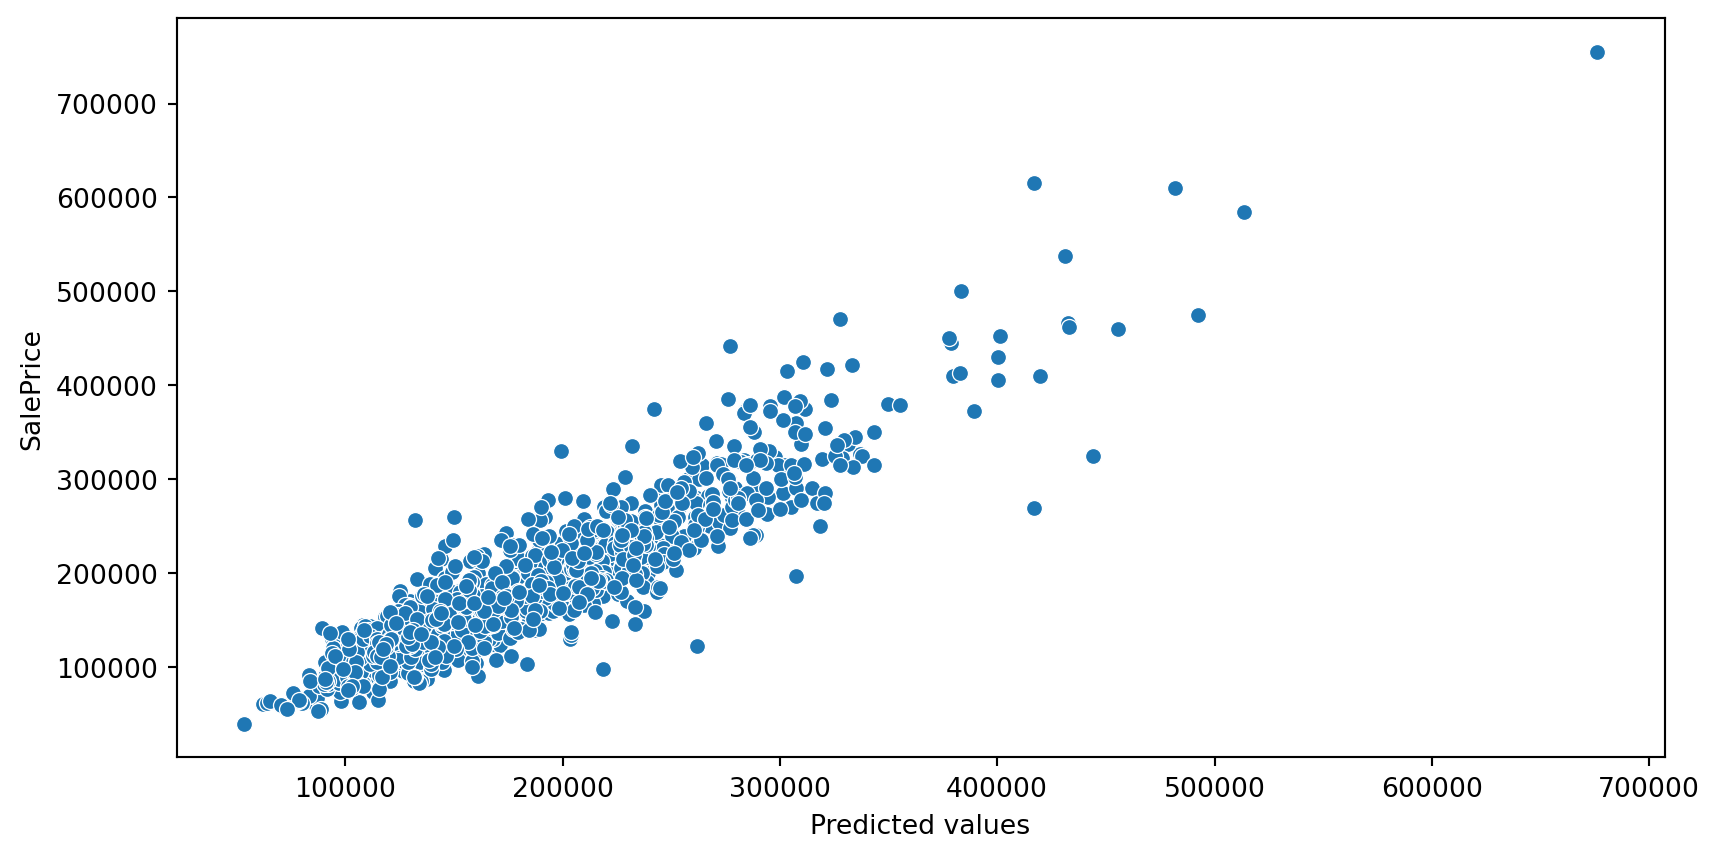

In [53]:
#| fig-pos: 't'
plt.close()
sns.scatterplot(x=y_linear_log, y=y_train);
plt.xlabel("Predicted values");
plt.show()

In [54]:
from sklearn.linear_model import LassoCV
m_lassoCV = LassoCV(cv = 5, alphas = np.linspace(0.00001, 0.001, 100), max_iter = 10000)
m_lassoCV = m_lassoCV.fit(X_train, np.log(y_train))

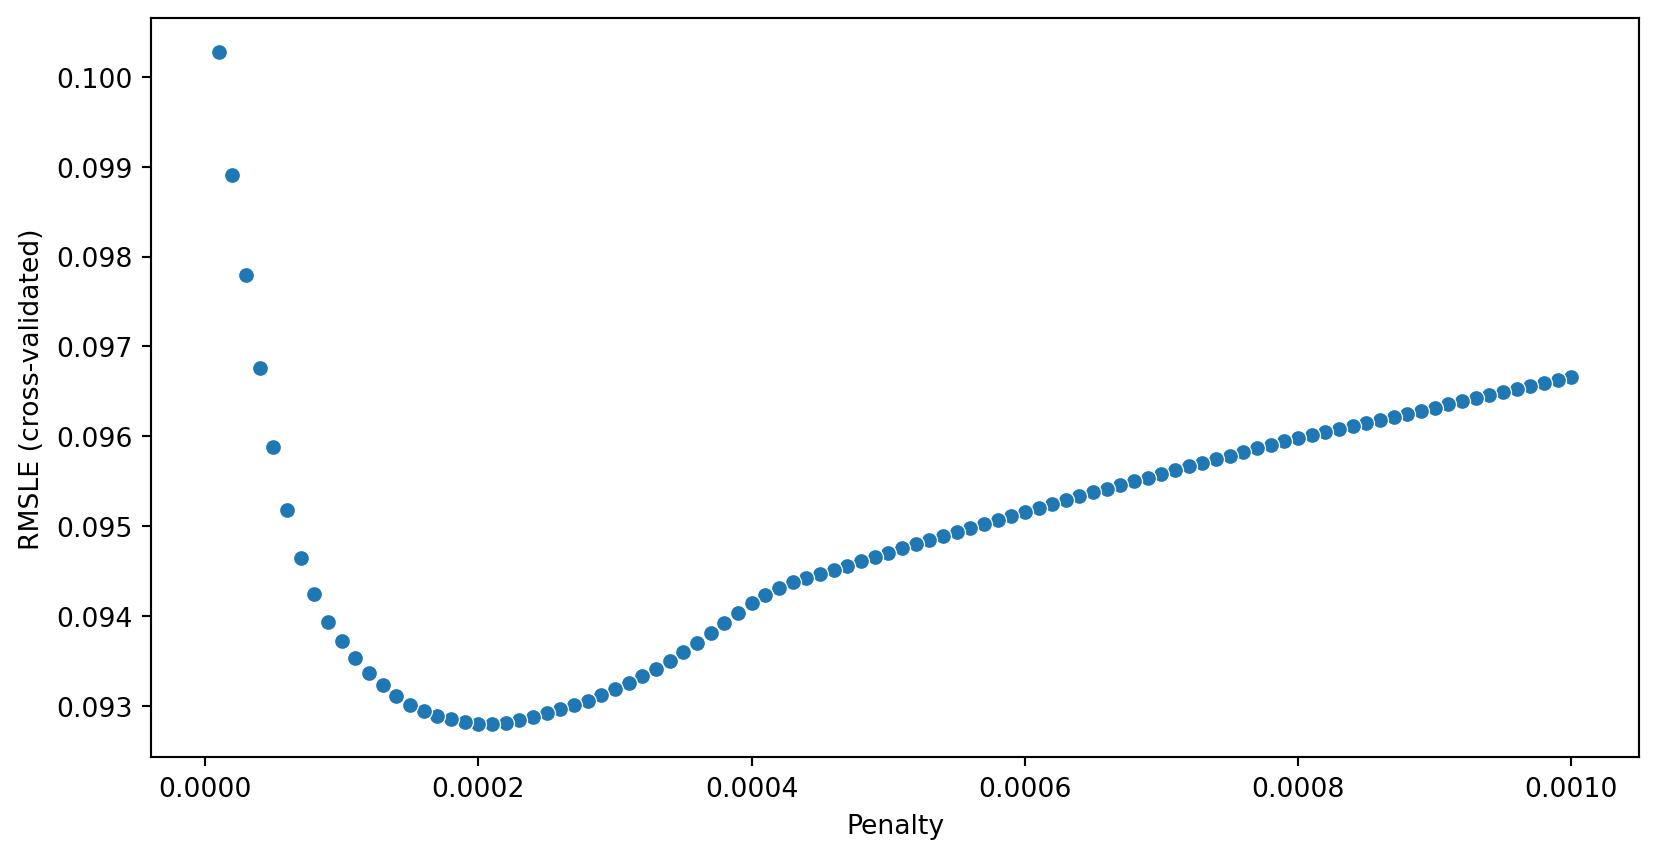

In [55]:
#| fig-pos: 't'
plt.close()
sns.scatterplot(x=m_lassoCV.alphas_, y=np.sqrt(m_lassoCV.mse_path_).mean(axis = 1))
plt.xlabel("Penalty");
plt.ylabel("RMSLE (cross-validated)");
plt.show()

In [56]:
from sklearn.linear_model import Lasso
m_lasso = Lasso(alpha = m_lassoCV.alpha_, max_iter = 10000)
y_lasso_log = np.exp(cross_val_predict(m_lasso, X_train, np.log(y_train), method = 'predict', cv = 5))
scores_report(y_train, y_lasso_log)

Mean absolute error (MAE):  11763.9361
Root mean squared logarithmic error (RMSLE):  0.093


In [57]:
m_lasso = m_lasso.fit(X_train, np.log(y_train))

In [58]:
X_train.shape

(1544, 266)

In [59]:
sum(m_lasso.coef_!=0)

137

In [60]:
coef = pd.Series(m_lasso.coef_, index = X_train.columns)
imp_coef = pd.concat([coef.sort_values().head(5), coef.sort_values().tail(5)])
imp_coef

Neighborhood_MeadowV   -0.106988
Neighborhood_Edwards   -0.056878
Neighborhood_OldTown   -0.054199
Central Air_N          -0.054067
Roof Matl_CompShg      -0.041339
Overall Qual            0.068844
Alley_Pave              0.077384
Neighborhood_Crawfor    0.093538
Gr Liv Area             0.124238
Neighborhood_GrnHill    0.375447
dtype: float64

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Set the grid of parameters to explore
param_grid = {
    'max_depth' : [None],
    'max_features': [None, 50, 100]
}

# Create a base model
m_rf = RandomForestRegressor()

# Instantiate the grid search model
grid_rf = GridSearchCV(estimator = m_rf, param_grid = param_grid, cv = 5, scoring = 'neg_root_mean_squared_error', verbose = 1)

# Estimation and check of the best hyperparameters (it may take some time)
grid_rf.fit(X_train, np.log(y_train));

# Estimation
grid_rf.best_params_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


{'max_depth': None, 'max_features': 50}

In [62]:
m_rf = RandomForestRegressor(max_features = 50, max_depth = None)
y_rf = np.exp(cross_val_predict(m_rf, X_train, np.log(y_train), method = 'predict', cv = 5))
scores_report(y_train, y_rf)

Mean absolute error (MAE):  14281.3507
Root mean squared logarithmic error (RMSLE):  0.1139


In [63]:
m_rf = m_rf.fit(X_train, np.log(y_train))

In [64]:
rf_coef = pd.Series(m_rf.feature_importances_, index = X_train.columns)
rf_coef.sort_values(ascending = False).head(15)

Overall Qual                 0.163681
Gr Liv Area                  0.110766
Tot Bathrooms                0.104426
Total Bsmt SF                0.070991
Garage Cars                  0.065279
Exter Qual_TA                0.063963
Garage Area                  0.041618
1st Flr SF                   0.037643
House Age                    0.023020
Lot Area                     0.021252
Fireplaces                   0.019349
BsmtFin SF 1                 0.019113
2nd Flr SF                   0.015289
Exter Qual_Gd                0.014332
Fireplace Qu_No fireplace    0.013967
dtype: float64

In [65]:
from sklearn.ensemble import GradientBoostingRegressor

# Set the grid of parameters to explore
param_grid = {
    'max_depth' : [2],
    'subsample' : [1],
    'learning_rate': np.linspace(0.01, 0.2, 5),
    'n_estimators': [2000]
}

# Create a base model
m_gb = GradientBoostingRegressor()

# Instantiate the grid search model
grid_gb = GridSearchCV(estimator = m_gb, param_grid = param_grid, cv = 5, scoring = 'neg_root_mean_squared_error', verbose = 1)

# Estimation and identification of the best hyperparameters (it may take some time)
grid_gb.fit(X_train, np.log(y_train));

# Best parameters according to CV
grid_gb.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


{'learning_rate': 0.0575, 'max_depth': 2, 'n_estimators': 2000, 'subsample': 1}

In [66]:
# Fit a linear regression model
m_gb = GradientBoostingRegressor(learning_rate =  0.0575, max_depth = 2, n_estimators =  2000, subsample = 1)

# Compute the predicted labels
y_gb = np.exp(cross_val_predict(m_gb, X_train, np.log(y_train), method = 'predict', cv = 5))

scores_report(y_train, y_gb)

Mean absolute error (MAE):  12207.9731
Root mean squared logarithmic error (RMSLE):  0.095


In [67]:
m_gb.fit(X_train, np.log(y_train));

In [68]:
y_lasso_test = np.exp(m_lasso.predict(X_test))
scores_report(y_test, y_lasso_test)

Mean absolute error (MAE):  11428.6164
Root mean squared logarithmic error (RMSLE):  0.092


In [69]:
y_rf_test = np.exp(m_rf.predict(X_test))
scores_report(y_test, y_rf_test)

Mean absolute error (MAE):  12606.2669
Root mean squared logarithmic error (RMSLE):  0.1079


In [70]:
y_gb_test = np.exp(m_gb.predict(X_test))
scores_report(y_test, y_gb_test)

Mean absolute error (MAE):  10919.4776
Root mean squared logarithmic error (RMSLE):  0.086
